#REGRESSÃO


##Pré-processamento necessário para treinar um K-NN

*Importação das bibliotecas necessárias*

In [ ]:
import pandas as pd
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*Verificação dos dados*

In [ ]:
# Carregmento do conjunto de dados
df = pd.read_csv("/content/drive/My Drive/dados_mba/vehicles_dataset.csv")

In [ ]:
#Verificação dos dados
df.head()

In [ ]:
#Verificação dos tipos dados
df.dtypes

name               object
description        object
make               object
model              object
type               object
year                int64
price             float64
engine             object
cylinders         float64
fuel               object
mileage           float64
transmission       object
trim               object
body               object
doors             float64
exterior_color     object
interior_color     object
drivetrain         object
dtype: object

In [ ]:
#Verificação das infos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   type            1002 non-null   object 
 5   year            1002 non-null   int64  
 6   price           979 non-null    float64
 7   engine          1000 non-null   object 
 8   cylinders       897 non-null    float64
 9   fuel            995 non-null    object 
 10  mileage         968 non-null    float64
 11  transmission    1000 non-null   object 
 12  trim            1001 non-null   object 
 13  body            999 non-null    object 
 14  doors           995 non-null    float64
 15  exterior_color  997 non-null    object 
 16  interior_color  964 non-null    object 
 17  drivetrain      1002 non-null   o

In [ ]:
#Verificação das infos dados
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1002.0,2023.916168,0.298109,2023.0,2024.0,2024.0,2024.0,2025.0
price,979.0,50202.985700,18700.392062,0.0,36600.0,47165.0,58919.5,195895.0
cylinders,897.0,4.975474,1.392526,0.0,4.0,4.0,6.0,8.0
mileage,968.0,69.033058,507.435745,0.0,4.0,8.0,13.0,9711.0
doors,995.0,3.943719,0.274409,2.0,4.0,4.0,4.0,5.0


In [ ]:
#Checar distribuição
df['price'].value_counts()

price
46835.0    13
47340.0    10
28860.0     6
54949.0     5
47785.0     4
           ..
34492.0     1
36000.0     1
53160.0     1
59116.0     1
48995.0     1
Name: count, Length: 859, dtype: int64

In [ ]:
#Checar distribuição (proporção)
df['price'].value_counts(normalize=True)

price
46835.0    0.013279
47340.0    0.010215
28860.0    0.006129
54949.0    0.005107
47785.0    0.004086
             ...   
34492.0    0.001021
36000.0    0.001021
53160.0    0.001021
59116.0    0.001021
48995.0    0.001021
Name: proportion, Length: 859, dtype: float64

In [ ]:
#Verificar os dados faltando
df.isnull().sum()


name                0
description        56
make                0
model               0
type                0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

*Tratamento dos dados*

In [ ]:
#Fill com mediana
mediana_preco = df['price'].median()
df['price'].fillna(mediana_preco, inplace=True)


In [ ]:
#Fill com mediana
mediana_doors = df['doors'].median()
df['doors'].fillna(mediana_doors, inplace=True)

In [ ]:
#Fill com valores mais frequentes
most_frequent_cylinders = df['cylinders'].mode()[0]

df['cylinders'].fillna(most_frequent_cylinders, inplace=True)


In [ ]:
#Fill com valores mais frequentes
most_frequent_mileage = df['mileage'].mode()[0]

df['mileage'].fillna(most_frequent_mileage, inplace=True)


In [ ]:
#Verificar os dados faltando
df.isnull().sum()

name               0
description       56
make               0
model              0
type               0
year               0
price              0
engine             2
cylinders          0
fuel               7
mileage            0
transmission       2
trim               1
body               3
doors              0
exterior_color     5
interior_color    38
drivetrain         0
dtype: int64

In [ ]:
#Outliers

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

In [ ]:
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [ ]:
limite_inferior, limite_inferior

(4174.125, 4174.125)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ac885e5c400>,
 'caps': [<matplotlib.lines.Line2D at 0x7ac885e5c940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ac885e5c130>],
 'medians': [<matplotlib.lines.Line2D at 0x7ac885e5ce80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ac885e5d120>],
 'means': []}

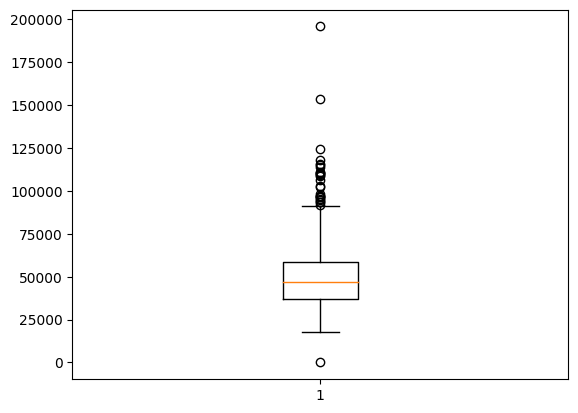

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df.price)

In [ ]:
# Importação do StandardScaler
from sklearn.preprocessing import StandardScaler


**REGRESSÃO** <br>
• Escolha os parâmetros mais adequados para o K-NN


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


In [ ]:
X = df[['year','cylinders','mileage']]
X.head(2)
y = df['price']

NameError: name 'df' is not defined

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definição do modelo k-NN
knn = KNeighborsRegressor()

*Modelagem*

In [ ]:
# Divisão dos dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalização dos dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Treinando o modelo
modelo = LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Fazendo as previsões
y_pred = modelo.predict(X_test)

In [ ]:
#Calculando o erro quadrático médio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'O MSE é {round(mse, 2)}')

O MSE é 230415882.58


In [ ]:
# Calculando o erro absoluto médio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'O MAE é {round(mae, 2)}')

O MAE é 12118.17


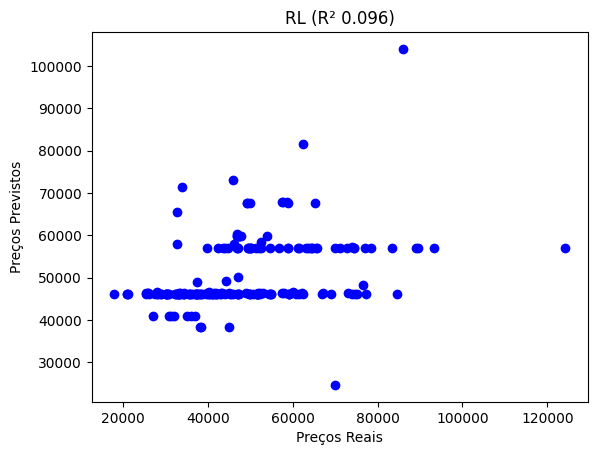

In [ ]:
#Calculando R² - Conjunto teste

r2 = modelo.score(X_test, y_test)

plt.scatter(y_test,y_pred,color='blue')
plt.xlabel('Preços Reais')
plt.ylabel('Preços Previstos')
plt.title(f'RL (R² {r2:.3f})')
plt.show()

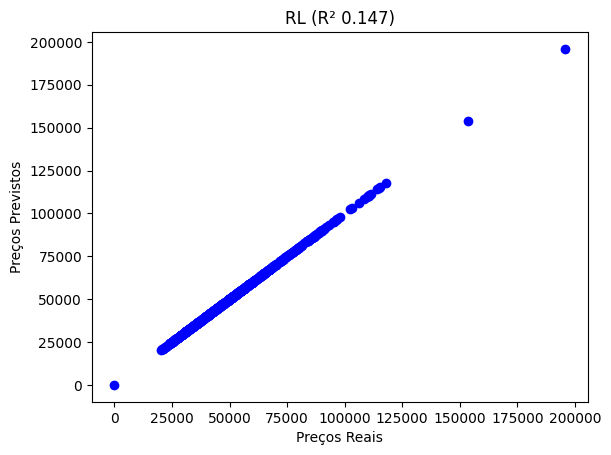

In [ ]:
#Calculando R² - conjunto treinamento

r2 = modelo.score(X_train, y_train)

plt.scatter(y_train,y_train,color='blue')
plt.xlabel('Preços Reais')
plt.ylabel('Preços Previstos')
plt.title(f'RL (R² {r2:.3f})')
plt.show()

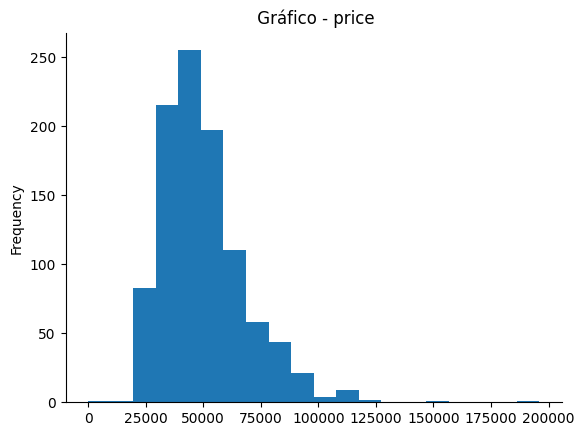

In [ ]:
# Gráfico de distribuição da variável 'price'

df['price'].plot(kind='hist', bins=20, title=' Gráfico - price')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()